## Random Forest Classifier

### Importing the required Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

### Reading the data

In [2]:
df1 = pd.read_csv('Training.csv')
df2 = pd.read_csv('Testing.csv')

In [3]:
df = pd.concat([df1, df2])

In [4]:
df.shape # checks the numbe rof rows and column

(4961, 133)

In [5]:
df.head(3)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [6]:
df.groupby(by='prognosis').sum().head(5)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
prognosis,,,,,,,,,,,,,,,,,,,,,
(vertigo) Paroymsal Positional Vertigo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AIDS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Acne,0,115,0,0,0,0,0,0,0,0,...,109,109,109,0,0,0,0,0,0,0
Alcoholic hepatitis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Allergy,0,0,0,109,109,109,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
# creating instance of labelencoder
le = LabelEncoder()
# Assigning numerical values and storing in another column
df['prognosis'] = le.fit_transform(df['prognosis'])

In [10]:
Disease =le.classes_
Label=le.transform(Disease)
eco_values = pd.DataFrame({'Disease':Disease, 'Label':Label})
eco_values.head(3)

,Disease,Label
0,(vertigo) Paroymsal Positional Vertigo,0
1,AIDS,1
2,Acne,2


In [11]:
X = df.drop('prognosis', axis = 1)
y = df['prognosis']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 23)

In [27]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1)

In [28]:
y_pred = model.predict(X_test)

In [29]:
print('Accuracy on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy on test set: 1.00


### Confusion Matrix

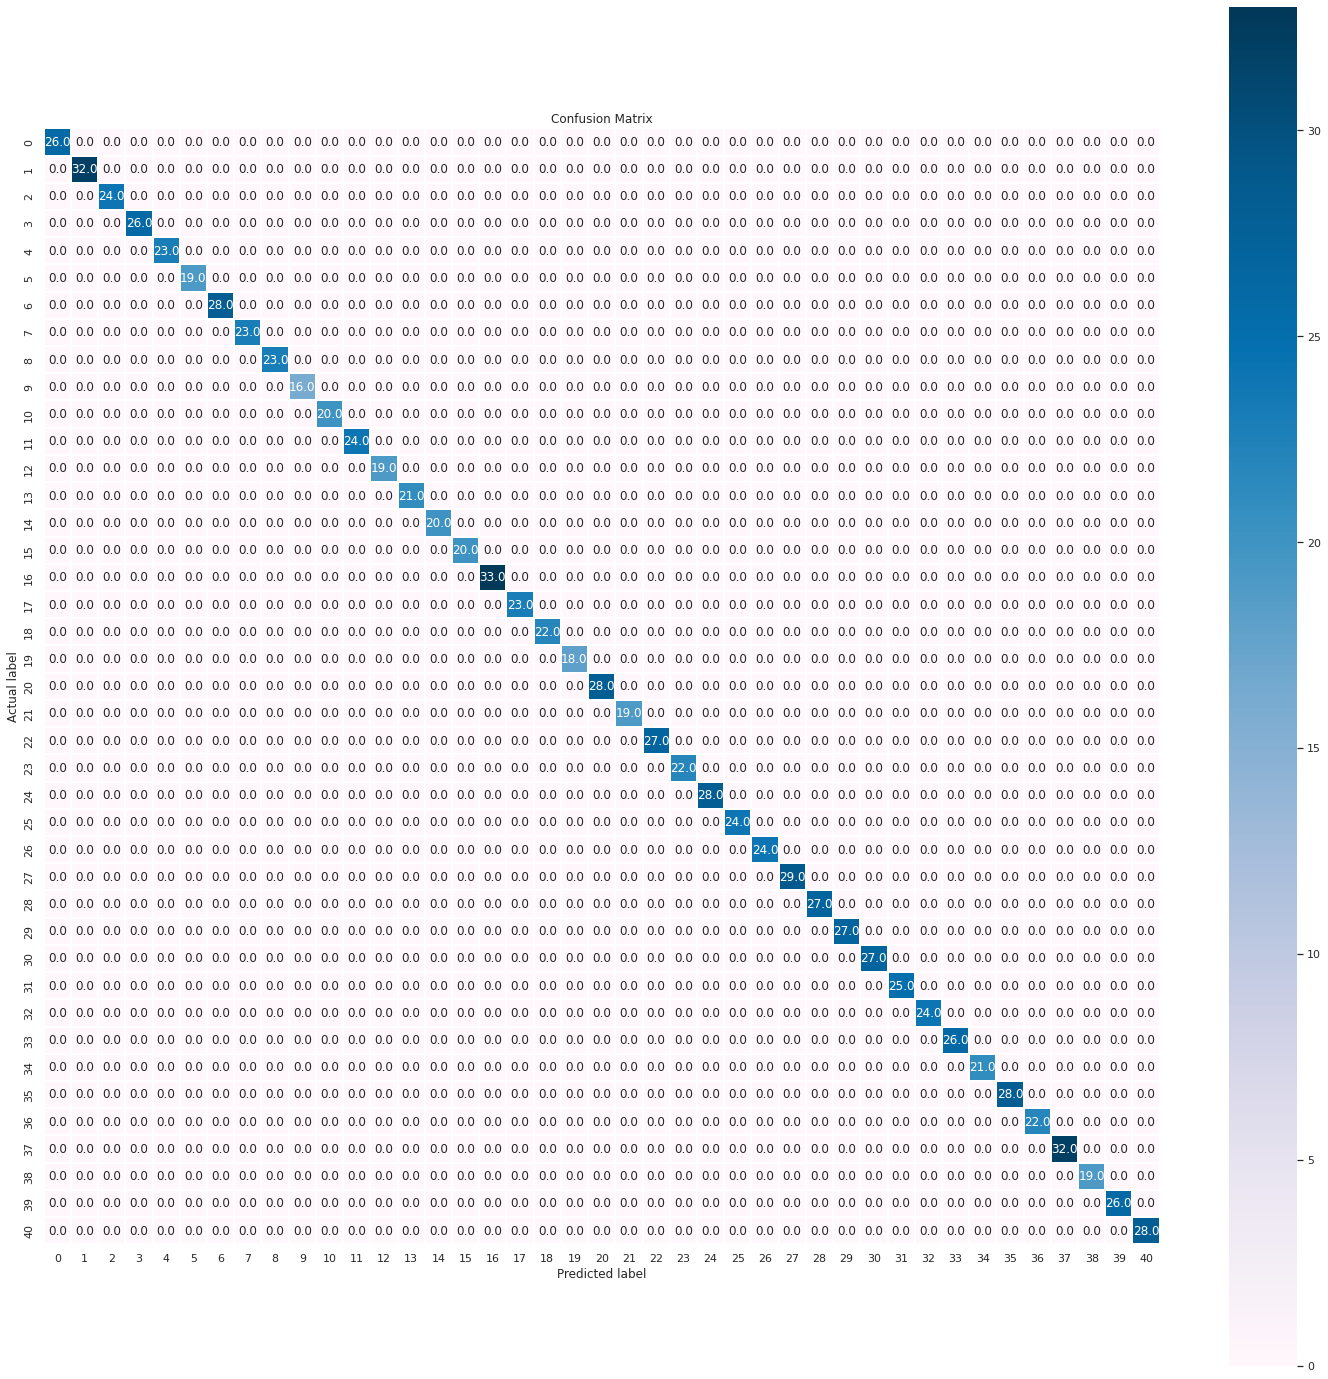

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(25,25))
sns.heatmap(confusion_matrix, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix',size = 12)
plt.show()
print("\n")

### Cross Validation

In [31]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10)
model = RandomForestClassifier(n_estimators=20)
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.2f" % (results.mean()))

10-fold cross validation average accuracy: 1.00
